In [1]:
import pandas as pd

In [142]:
df = pd.read_csv('./data/second_innings_updated.csv')
df

,match_id,venue,innings,ball,batting_team,bowling_team,runs_off_bat,extras,wides,noballs,byes,legbyes,wicket_type,runs_required,runs_scored,wickets_remaining,balls_remaining,crr,rrr,winner
0,1001349,Melbourne Cricket Ground,2,0.1,Sri Lanka,Australia,1,0,NaN,NaN,NaN,NaN,NaN,168.0,1.0,10.0,119.0,6.00,8.47,1.0
1,1001349,Melbourne Cricket Ground,2,0.2,Sri Lanka,Australia,0,1,NaN,NaN,NaN,1.0,NaN,167.0,2.0,10.0,118.0,6.00,8.49,1.0
2,1001349,Melbourne Cricket Ground,2,0.3,Sri Lanka,Australia,0,0,NaN,NaN,NaN,NaN,NaN,167.0,2.0,10.0,117.0,4.00,8.56,1.0
3,1001349,Melbourne Cricket Ground,2,0.4,Sri Lanka,Australia,0,0,NaN,NaN,NaN,NaN,NaN,167.0,2.0,10.0,116.0,3.00,8.64,1.0
4,1001349,Melbourne Cricket Ground,2,0.5,Sri Lanka,Australia,3,0,NaN,NaN,NaN,NaN,NaN,164.0,5.0,10.0,115.0,6.00,8.56,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301197,995469,R Premadasa Stadium,2,17.1,Australia,Sri Lanka,1,0,NaN,NaN,NaN,NaN,NaN,8.0,121.0,4.0,17.0,7.05,2.82,1.0
301198,995469,R Premadasa Stadium,2,17.2,Australia,Sri Lanka,3,0,NaN,NaN,NaN,NaN,NaN,5.0,124.0,4.0,16.0,7.15,1.88,1.0
301199,995469,R Premadasa Stadium,2,17.3,Australia,Sri Lanka,0,0,NaN,NaN,NaN,NaN,NaN,5.0,124.0,4.0,15.0,7.09,2.00,1.0
301200,995469,R Premadasa Stadium,2,17.4,Australia,Sri Lanka,0,0,NaN,NaN,NaN,NaN,NaN,5.0,124.0,4.0,14.0,7.02,2.14,1.0


In [143]:
df.drop(columns=['venue', 'innings', 'ball', 'batting_team', 'bowling_team', 'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes', 'wicket_type'], inplace=True)
df.head()

,match_id,runs_required,runs_scored,wickets_remaining,balls_remaining,crr,rrr,winner
0,1001349,168.0,1.0,10.0,119.0,6.0,8.47,1.0
1,1001349,167.0,2.0,10.0,118.0,6.0,8.49,1.0
2,1001349,167.0,2.0,10.0,117.0,4.0,8.56,1.0
3,1001349,167.0,2.0,10.0,116.0,3.0,8.64,1.0
4,1001349,164.0,5.0,10.0,115.0,6.0,8.56,1.0


In [144]:
df.isna().sum()

match_id                0
runs_required           0
runs_scored             0
wickets_remaining       0
balls_remaining         0
crr                     0
rrr                     0
winner               4612
dtype: int64

In [145]:
df.dropna(inplace=True)

In [146]:
df.isna().sum()

match_id             0
runs_required        0
runs_scored          0
wickets_remaining    0
balls_remaining      0
crr                  0
rrr                  0
winner               0
dtype: int64

In [147]:
df.shape

(296590, 8)

In [148]:
df['runs_required'] = df['runs_required'].astype('int')
df['runs_scored'] = df['runs_scored'].astype('int')
df['wickets_remaining'] = df['wickets_remaining'].astype('int')
df['balls_remaining'] = df['balls_remaining'].astype('int')
df['winner'] = df['winner'].astype('int')

In [149]:
df.head()

,match_id,runs_required,runs_scored,wickets_remaining,balls_remaining,crr,rrr,winner
0,1001349,168,1,10,119,6.0,8.47,1
1,1001349,167,2,10,118,6.0,8.49,1
2,1001349,167,2,10,117,4.0,8.56,1
3,1001349,167,2,10,116,3.0,8.64,1
4,1001349,164,5,10,115,6.0,8.56,1


## Outlier Analysis

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fast')

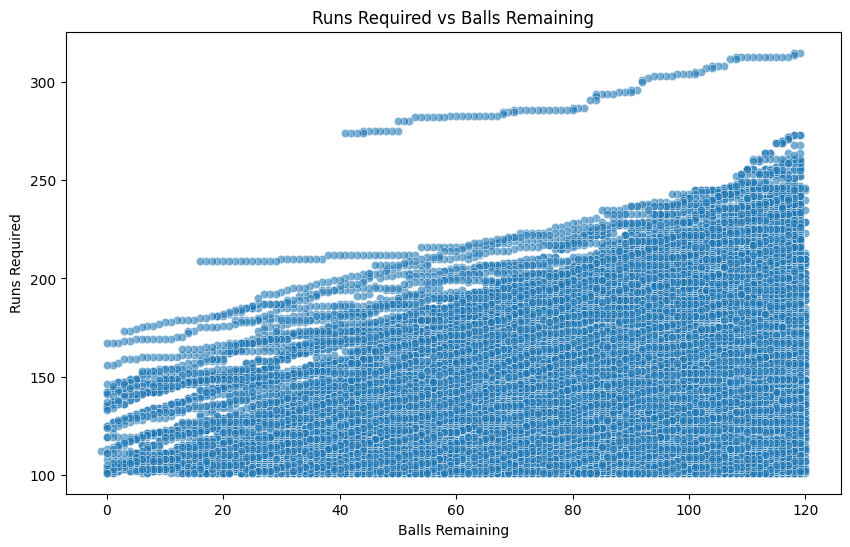

In [151]:
# scatter plot for runs required with minimum runs 100 vs balls remaining
plt.figure(figsize=(10, 6))
sns.scatterplot(x='balls_remaining', y='runs_required', data=df[(df['runs_required'] > 100)], alpha=0.6)
plt.title('Runs Required vs Balls Remaining')
plt.xlabel('Balls Remaining')
plt.ylabel('Runs Required')
plt.show()

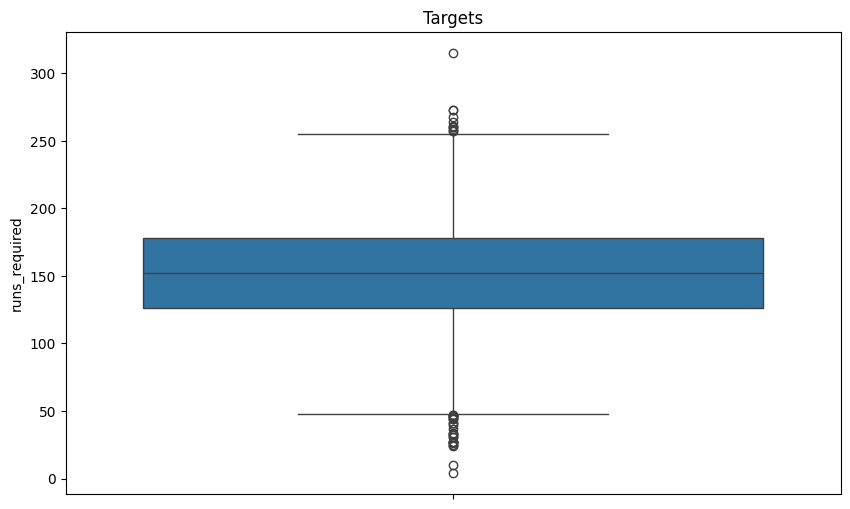

In [152]:
# boxplot for runs remaining with more than 119 balls remaining
plt.figure(figsize=(10, 6))
sns.boxplot(y='runs_required', data=df[(df['balls_remaining'] >= 119)])
plt.title('Targets')
plt.show()

In [153]:
# get q1, q2, q3 for runs remaining with more than 119 balls remaining
q1 = df[(df['balls_remaining'] >= 119)]['runs_required'].quantile(0.25)
q2 = df[(df['balls_remaining'] >= 119)]['runs_required'].quantile(0.5)
q3 = df[(df['balls_remaining'] >= 119)]['runs_required'].quantile(0.75)

print(f'Q1: {q1}, Q2: {q2}, Q3: {q3}')

iqr = q3 - q1

# get lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

print(f'Lower Bound: {lower_bound}, Upper Bound: {upper_bound}')

Q1: 126.0, Q2: 152.0, Q3: 178.0
Lower Bound: 48.0, Upper Bound: 256.0


In [154]:
# find match_id for outliers accordingly
outliers = df[(df['balls_remaining'] >= 119)][(df['runs_required'] < lower_bound) | (df['runs_required'] > upper_bound)]

outlier_matches = outliers['match_id'].unique()

outlier_matches

C:\Users\Rushabh Javeri\AppData\Local\Temp\ipykernel_17928\3550993586.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers = df[(df['balls_remaining'] >= 119)][(df['runs_required'] < lower_bound) | (df['runs_required'] > upper_bound)]


array([1122730, 1168113, 1176796, 1184901, 1273723, 1283030, 1299577,
       1310177, 1320974, 1322001, 1332506, 1343749, 1343756, 1343760,
       1343763, 1354803, 1373582, 1383101, 1383103, 1399104, 1400988,
       1418541, 1418543,  287860,  682933,  995467], dtype=int64)

In [155]:
df[df['match_id'].isin(outlier_matches)]

,match_id,runs_required,runs_scored,wickets_remaining,balls_remaining,crr,rrr,winner
9589,1122730,260,1,10,119,6.00,13.11,0
9590,1122730,260,1,10,118,3.00,13.22,0
9591,1122730,259,2,10,117,4.00,13.28,0
9592,1122730,258,3,10,116,4.50,13.34,0
9593,1122730,257,4,10,115,4.80,13.41,0
...,...,...,...,...,...,...,...,...
301087,995467,86,178,1,4,9.21,129.00,0
301088,995467,86,178,1,3,9.13,172.00,0
301089,995467,86,178,1,2,9.05,258.00,0
301090,995467,86,178,1,1,8.97,516.00,0


In [156]:
# drop where match id is in outlier_matches
df = df[~df['match_id'].isin(outlier_matches)]
df

,match_id,runs_required,runs_scored,wickets_remaining,balls_remaining,crr,rrr,winner
0,1001349,168,1,10,119,6.00,8.47,1
1,1001349,167,2,10,118,6.00,8.49,1
2,1001349,167,2,10,117,4.00,8.56,1
3,1001349,167,2,10,116,3.00,8.64,1
4,1001349,164,5,10,115,6.00,8.56,1
...,...,...,...,...,...,...,...,...
301197,995469,8,121,4,17,7.05,2.82,1
301198,995469,5,124,4,16,7.15,1.88,1
301199,995469,5,124,4,15,7.09,2.00,1
301200,995469,5,124,4,14,7.02,2.14,1


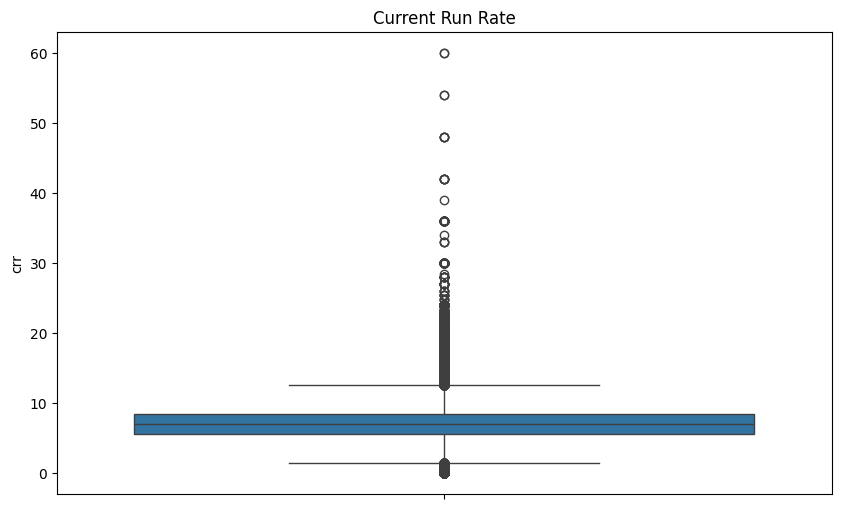

In [157]:
# boxplot for current run rate
plt.figure(figsize=(10, 6))
sns.boxplot(y='crr', data=df)
plt.title('Current Run Rate')
plt.show()

In [158]:
# get q1, q2, q3 for current run rate
q1 = df['crr'].quantile(0.25)
q2 = df['crr'].quantile(0.5)
q3 = df['crr'].quantile(0.75)

print(f'Q1: {q1}, Q2: {q2}, Q3: {q3}')

iqr = q3 - q1

# get lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

print(f'Lower Bound: {lower_bound}, Upper Bound: {upper_bound}')

Q1: 5.63, Q2: 6.97, Q3: 8.42
Lower Bound: 1.4449999999999994, Upper Bound: 12.605


In [159]:
# remove outliers
df = df[(df['crr'] > lower_bound) & (df['crr'] < upper_bound)]

print(df['crr'].min())
print(df['crr'].max())

1.46
12.6


In [160]:
# sort df by rrr
df.sort_values(by='rrr', ascending=True).head()

,match_id,runs_required,runs_scored,wickets_remaining,balls_remaining,crr,rrr,winner
177453,1321465,112,125,3,-1,6.20,-672.0,0
216227,1384593,42,146,1,-1,7.24,-252.0,0
196617,1344794,33,123,4,-1,6.10,-198.0,0
301201,995469,0,130,4,13,7.29,0.0,1
199998,1349390,0,165,9,36,11.79,0.0,1


In [161]:
# remove values where balls remaining is less than 0
df = df[df['balls_remaining'] >= 0]

In [162]:
df['rrr'].min()

0.0

In [163]:
df.sort_values(by='rrr', ascending=False).head(15)

,match_id,runs_required,runs_scored,wickets_remaining,balls_remaining,crr,rrr,winner
173402,1321272,167,44,3,0,2.20,1002.0,0
173401,1321272,167,44,3,1,2.22,1002.0,0
179632,1321998,156,58,2,1,2.92,936.0,0
179633,1321998,156,58,2,0,2.90,936.0,0
149039,1286670,146,89,5,1,4.49,876.0,0
149040,1286670,146,89,4,0,4.45,876.0,0
149768,1286677,145,95,2,1,4.79,870.0,0
41760,1208606,143,94,4,1,4.74,858.0,0
111938,1208606,143,94,4,1,4.74,858.0,0
41761,1208606,142,95,4,0,4.75,852.0,0


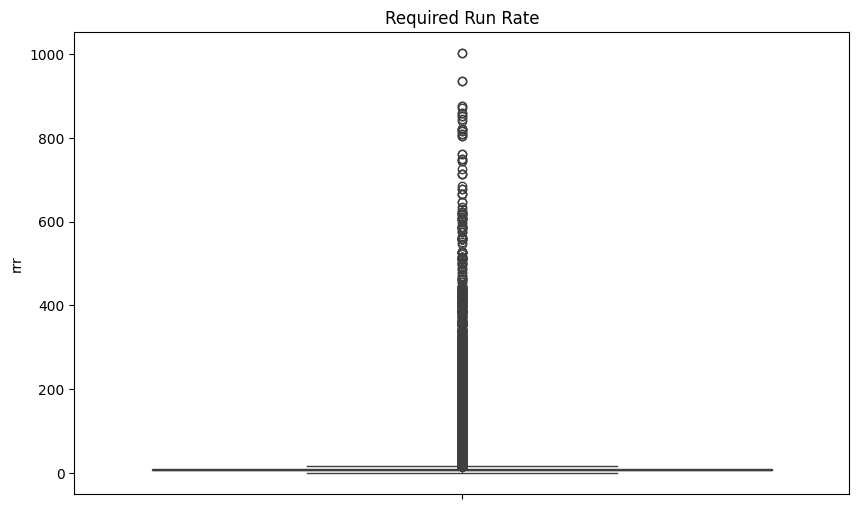

In [164]:
# boxplot for required run rate
plt.figure(figsize=(10, 6))
sns.boxplot(y='rrr', data=df)
plt.title('Required Run Rate')
plt.show()

In [165]:
# get q1, q2, q3 for required run rate
q1 = df['rrr'].quantile(0.25)
q2 = df['rrr'].quantile(0.5)
q3 = df['rrr'].quantile(0.75)

print(f'Q1: {q1}, Q2: {q2}, Q3: {q3}')

iqr = q3 - q1

# get lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

print(f'Lower Bound: {lower_bound}, Upper Bound: {upper_bound}')

Q1: 6.35, Q2: 8.5, Q3: 11.0
Lower Bound: -0.6250000000000009, Upper Bound: 17.975


In [166]:
df[df['rrr'] > upper_bound].shape

(20892, 8)

In [167]:
df = df[(df['rrr'] > lower_bound) & (df['rrr'] < upper_bound)]

In [168]:
df['rrr'].max()

17.91

In [169]:
df.shape

(263074, 8)

## Model Building

In [170]:
# preprocessing for model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

features = ['runs_required', 'wickets_remaining', 'crr', 'rrr', 'balls_remaining']

X = df[features]
# X = df[['runs_required', 'wickets_remaining', 'balls_remaining']]
y = df['winner']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=37)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [171]:
# logistic regression model
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

In [172]:
accuracy = lr_model.score(X_test, y_test)
accuracy

0.8195761664924451

In [173]:
print(X_test[10])
lr_model.predict_proba(X_test)[10]

[0.41269841 0.9        0.77448338 0.47738693 0.60833333]


array([0.29498366, 0.70501634])

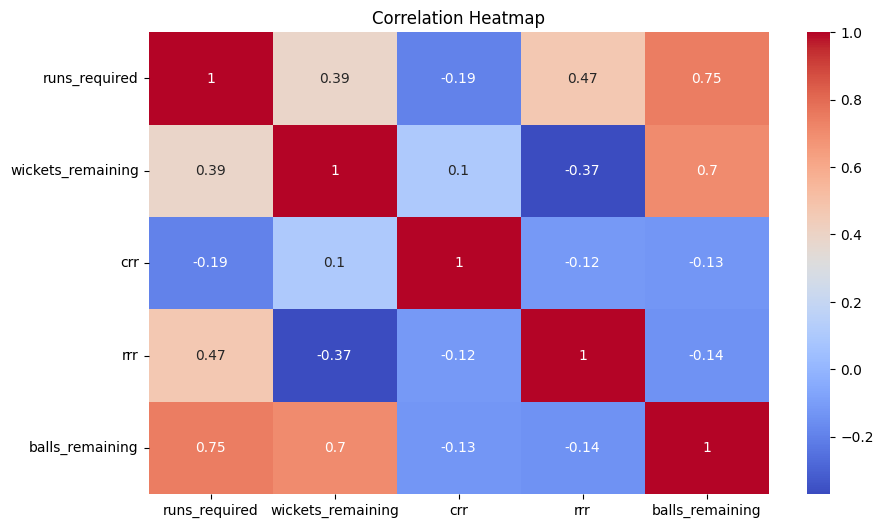

In [174]:
# correlation
corr = df[features].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [175]:
# test for custom input
# custom_data = [193, 10, 7, 9.8135593220, 118]
# custom_data = [10, 1, 5, 60, 1]
# custom_data = [74, 7, 7, 8.7, 51]
custom_data = [10, 5, 12, 60, 1]

# scale custom data
custom_data = scaler.transform([custom_data])

print(lr_model.predict(custom_data))

batting_team_probability = lr_model.predict_proba(custom_data)[0][1]
bowling_team_probability = lr_model.predict_proba(custom_data)[0][0]

print(f'Batting Team Probability: {batting_team_probability}')
print(f'Bowling Team Probability: {bowling_team_probability}')

[0]
Batting Team Probability: 3.0996308712234147e-10
Bowling Team Probability: 0.999999999690037


c:\Users\Rushabh Javeri\Sem-10\NNDL\Project\.venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [176]:
import pickle
import joblib

In [177]:
joblib.dump(scaler, './models/scaler.pkl')

['./models/scaler.pkl']

In [178]:
# load the scaler
scaler = joblib.load('./models/scaler.pkl')

# test on custom data
test_data = [[100, 5, 10, 10, 100]]
test_data = scaler.transform(test_data)

test_data

c:\Users\Rushabh Javeri\Sem-10\NNDL\Project\.venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.3968254 , 0.5       , 0.76639712, 0.55834729, 0.83333333]])

### Test model over ranges of overs

In [179]:
# make a function for above 5 cells
def get_accuracy(model, data, isnn=False):
    X = data[['runs_required', 'wickets_remaining', 'crr', 'rrr', 'balls_remaining']]
    y = data['winner']

    X = scaler.transform(X)

    accuracy = 0
    if isnn:
        accuracy = model.evaluate(X, y)[1]
    else:
        accuracy = model.score(X, y)
    return accuracy

def test_over_overs_5(model, isnn=False):
    first_5_overs = df[(df['balls_remaining'] >= 90)].copy()
    overs_5_10 = df[(df['balls_remaining'] >= 60) & (df['balls_remaining'] < 90)].copy()
    overs_10_15 = df[(df['balls_remaining'] >= 30) & (df['balls_remaining'] < 60)].copy()
    overs_15_20 = df[(df['balls_remaining'] < 30)].copy()

    first_5_overs_accuracy = get_accuracy(model, first_5_overs, isnn)
    overs_5_10_accuracy = get_accuracy(model, overs_5_10, isnn)
    overs_10_15_accuracy = get_accuracy(model, overs_10_15, isnn)
    overs_15_20_accuracy = get_accuracy(model, overs_15_20, isnn)

    return first_5_overs_accuracy, overs_5_10_accuracy, overs_10_15_accuracy, overs_15_20_accuracy

In [180]:
#write test_over_overs for 4 overs instead of 5

def test_over_overs_4(model, isnn=False):
    first_4_overs = df[(df['balls_remaining'] >= 96)].copy()
    overs_4_8 = df[(df['balls_remaining'] >= 72) & (df['balls_remaining'] < 96)].copy()
    overs_8_12 = df[(df['balls_remaining'] >= 48) & (df['balls_remaining'] < 72)].copy()
    overs_12_16 = df[(df['balls_remaining'] >= 24) & (df['balls_remaining'] < 48)].copy()
    overs_16_20 = df[(df['balls_remaining'] < 24)].copy()

    first_4_overs_accuracy = get_accuracy(model, first_4_overs, isnn)
    overs_4_8_accuracy = get_accuracy(model, overs_4_8, isnn)
    overs_8_12_accuracy = get_accuracy(model, overs_8_12, isnn)
    overs_12_16_accuracy = get_accuracy(model, overs_12_16, isnn)
    overs_16_20_accuracy = get_accuracy(model, overs_16_20, isnn)

    return first_4_overs_accuracy, overs_4_8_accuracy, overs_8_12_accuracy, overs_12_16_accuracy, overs_16_20_accuracy

In [181]:
acc_0_5, acc_5_10, acc_10_15, acc_15_20 = test_over_overs_5(lr_model)

print(f'First  Overs Accuracy: {acc_0_5}')
print(f'5-10 Overs Accuracy: {acc_5_10}')
print(f'10-15 Overs Accuracy: {acc_10_15}')
print(f'15-20 Overs Accuracy: {acc_15_20}')

First  Overs Accuracy: 0.7628612907483173
5-10 Overs Accuracy: 0.8155030099919319
10-15 Overs Accuracy: 0.8589230704896782
15-20 Overs Accuracy: 0.868421052631579


In [182]:
acc_0_4, acc_4_8, acc_8_12, acc_12_16, acc_16_20 = test_over_overs_4(lr_model)

print(f'First 4 Overs Accuracy: {acc_0_4}')
print(f'4-8 Overs Accuracy: {acc_4_8}')
print(f'8-12 Overs Accuracy: {acc_8_12}')
print(f'12-16 Overs Accuracy: {acc_12_16}')
print(f'16-20 Overs Accuracy: {acc_16_20}')

First 4 Overs Accuracy: 0.7543638169300948
4-8 Overs Accuracy: 0.8034001475651746
8-12 Overs Accuracy: 0.8386926219658736
12-16 Overs Accuracy: 0.8688390184376609
16-20 Overs Accuracy: 0.8640670400471638


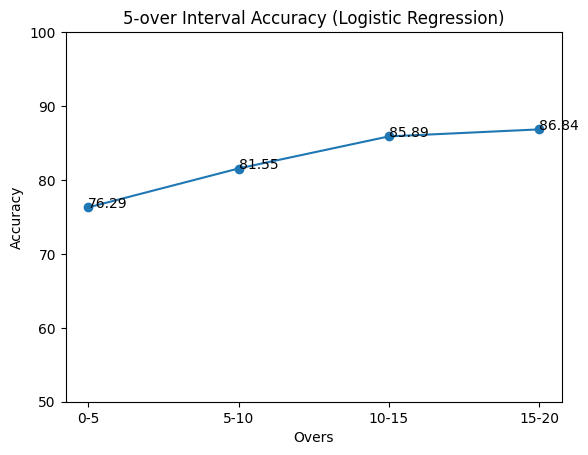

In [186]:
x = ['0-5', '5-10', '10-15', '15-20']
y = [acc_0_5 * 100, acc_5_10 * 100, acc_10_15 * 100, acc_15_20 * 100]

plt.plot(x, y, marker='o')
plt.ylim(50, 100)
plt.title('5-over Interval Accuracy (Logistic Regression)')
plt.xlabel('Overs')
for i in range(len(x)):
    plt.text(x[i], y[i], round(y[i],2))
plt.ylabel('Accuracy')
plt.show()

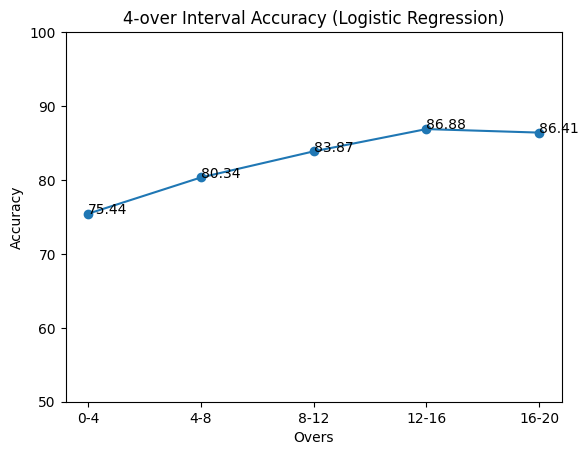

In [185]:
#Plot for 4 overs
x = ['0-4', '4-8', '8-12', '12-16', '16-20']
y = [acc_0_4 * 100, acc_4_8 * 100, acc_8_12 * 100, acc_12_16 * 100, acc_16_20 * 100]

plt.plot(x, y, marker='o')
plt.ylim(50, 100)
plt.title('4-over Interval Accuracy (Logistic Regression)')
plt.xlabel('Overs')
for i in range(len(x)):
    plt.text(x[i], y[i], round(y[i],2))
plt.ylabel('Accuracy')
plt.show()

In [187]:
pickle.dump(lr_model, open('./models/logistic_regression.pkl', 'wb'))

## Random Forest

In [188]:
from sklearn.ensemble import RandomForestClassifier

In [189]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [190]:
rf_classifier.score(X_test, y_test)

0.8941746650194812

In [75]:
print(X_test[11])

print(rf_classifier.predict(X_test[11].reshape(1, -1)))

batting_team_probability = rf_classifier.predict_proba(X_test)[11][1]
bowling_team_probability = rf_classifier.predict_proba(X_test)[11][0]

print(f'Batting Team Probability: {batting_team_probability}')
print(f'Bowling Team Probability: {bowling_team_probability}')

[0.33333333 0.9        0.71608266 0.54103853 0.43333333]
[1]
Batting Team Probability: 0.94
Bowling Team Probability: 0.06


In [191]:
# custom_data = [74, 7, 7, 14.8, 30]
custom_data = [10, 5, 12, 60, 1]
custom_data = scaler.transform([custom_data])

print(rf_classifier.predict(custom_data))

batting_team_probability = rf_classifier.predict_proba(custom_data)[0][1]
bowling_team_probability = rf_classifier.predict_proba(custom_data)[0][0]

print(f'Batting Team Probability: {batting_team_probability}')
print(f'Bowling Team Probability: {bowling_team_probability}')

[0]
Batting Team Probability: 0.21
Bowling Team Probability: 0.79


c:\Users\Rushabh Javeri\Sem-10\NNDL\Project\.venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [192]:
# save model
pickle.dump(rf_classifier, open('./models/random_forest.pkl', 'wb'))

In [193]:
# test for 5 over intervals
acc_0_5, acc_5_10, acc_10_15, acc_15_20 = test_over_overs_5(rf_classifier)

print(f'First 5 Overs Accuracy: {acc_0_5}')
print(f'5-10 Overs Accuracy: {acc_5_10}')
print(f'10-15 Overs Accuracy: {acc_10_15}')
print(f'15-20 Overs Accuracy: {acc_15_20}')

First 5 Overs Accuracy: 0.9309489243764023
5-10 Overs Accuracy: 0.9753118599888289
10-15 Overs Accuracy: 0.982854992263838
15-20 Overs Accuracy: 0.9846848391336648


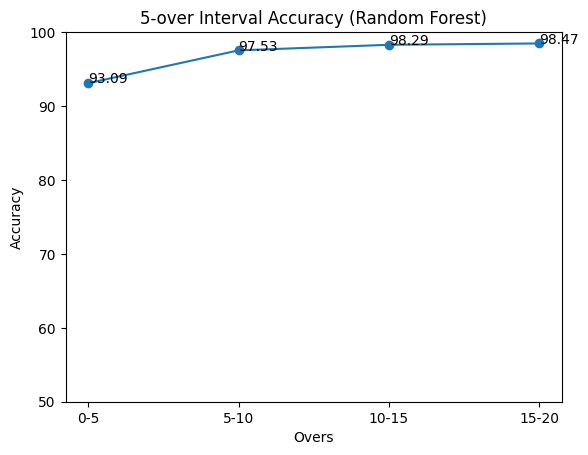

In [197]:
# plot
x = ['0-5', '5-10', '10-15', '15-20']
y = [acc_0_5 * 100, acc_5_10 * 100, acc_10_15 * 100, acc_15_20 * 100]

plt.plot(x, y, marker='o')
plt.ylim(50, 100)
plt.title('5-over Interval Accuracy (Random Forest)')
plt.xlabel('Overs')
for i in range(len(x)):
    plt.text(x[i], y[i], round(y[i],2))
plt.ylabel('Accuracy')
plt.show()

In [198]:
# test for 4 over intervals
acc_0_4, acc_4_8, acc_8_12, acc_12_16, acc_16_20 = test_over_overs_4(rf_classifier)

print(f'First 4 Overs Accuracy: {acc_0_4}')
print(f'4-8 Overs Accuracy: {acc_4_8}')
print(f'8-12 Overs Accuracy: {acc_8_12}')
print(f'12-16 Overs Accuracy: {acc_12_16}')
print(f'16-20 Overs Accuracy: {acc_16_20}')

First 4 Overs Accuracy: 0.9229578010065815
4-8 Overs Accuracy: 0.9694724545007378
8-12 Overs Accuracy: 0.9800688936954258
12-16 Overs Accuracy: 0.9846511716590082
16-20 Overs Accuracy: 0.9842085316039921


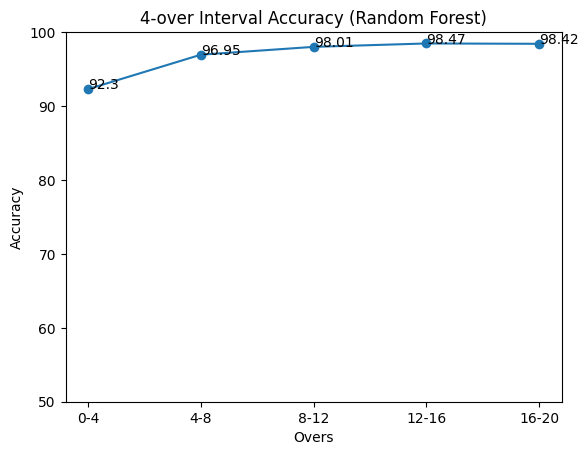

In [200]:
# plot
x = ['0-4', '4-8', '8-12', '12-16', '16-20']
y = [acc_0_4 * 100, acc_4_8 * 100, acc_8_12 * 100, acc_12_16 * 100, acc_16_20 * 100]

plt.plot(x, y, marker='o')
plt.ylim(50, 100)
plt.title('4-over Interval Accuracy (Random Forest)')
plt.xlabel('Overs')
for i in range(len(x)):
    plt.text(x[i], y[i], round(y[i],2))
plt.ylabel('Accuracy')
plt.show()

# Testing Various Models

In [118]:
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [119]:
from sklearn.metrics import make_scorer, accuracy_score

In [120]:
from sklearn.model_selection import GridSearchCV

### SVC

In [138]:
svc_clf = SVC() 
svc_clf.fit(X_train[:50000], y_train[:50000])
pred_svc = svc_clf.predict(X_test[:10000])
acc_svc = accuracy_score(y_test[:10000], pred_svc)

print(acc_svc)

0.8213


### LinearSVC

In [124]:
linsvc_clf = LinearSVC()
linsvc_clf.fit(X_train, y_train)
pred_linsvc = linsvc_clf.predict(X_test)
acc_linsvc = accuracy_score(y_test, pred_linsvc)

print(acc_linsvc)

c:\Users\Rushabh Javeri\Sem-10\NNDL\Project\.venv\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


0.8196331844531027


### RandomForest

In [125]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
pred_rf = rf_clf.predict(X_test)
acc_rf = accuracy_score(y_test, pred_rf)

print(acc_rf)

0.8943077069276822


### Logistic Regression

In [126]:
logreg_clf = LogisticRegression()
logreg_clf.fit(X_train, y_train)
pred_logreg = logreg_clf.predict(X_test)
acc_logreg = accuracy_score(y_test, pred_logreg)

print(acc_logreg)

0.8195761664924451


### KNN

In [127]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
pred_knn = knn_clf.predict(X_test)
acc_knn = accuracy_score(y_test, pred_knn)

print(acc_knn)

0.877354366625487


### Gaussian NB

In [128]:
gnb_clf = GaussianNB()
gnb_clf.fit(X_train, y_train)
pred_gnb = gnb_clf.predict(X_test)
acc_gnb = accuracy_score(y_test, pred_gnb)

print(acc_gnb)

0.8152998194431246


### Decision Tree

In [129]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
pred_dt = dt_clf.predict(X_test)
acc_dt = accuracy_score(y_test, pred_dt)

print(acc_dt)

0.8813456238715195


### XGBoost

In [130]:
from xgboost import XGBClassifier

xg_clf = XGBClassifier(objective="binary:logistic", n_estimators=10, seed=123)
xg_clf.fit(X_train, y_train)
pred_xg = xg_clf.predict(X_test)
acc_xg = accuracy_score(y_test, pred_xg)

print(acc_xg)

0.8262852798631569


## Evaluating Performance

In [139]:
model_performance = pd.DataFrame({
    "Model": ["SVC", "Linear SVC", "Random Forest", 
              "Logistic Regression", "K Nearest Neighbors", "Gaussian Naive Bayes",  
              "Decision Tree", "XGBClassifier"],
    "Accuracy": [acc_svc, acc_linsvc, acc_rf, 
              acc_logreg, acc_knn, acc_gnb, acc_dt, acc_xg]
})

model_performance.sort_values(by="Accuracy", ascending=False)

,Model,Accuracy
2,Random Forest,0.894308
6,Decision Tree,0.881346
4,K Nearest Neighbors,0.877354
7,XGBClassifier,0.826285
0,SVC,0.821300
1,Linear SVC,0.819633
3,Logistic Regression,0.819576
5,Gaussian Naive Bayes,0.815300


## Tuning Hyperparameters

In [201]:
rf_clf = RandomForestClassifier()

parameters = {
    "n_estimators": [4, 6, 8, 10, 15], 
    "criterion": ["gini", "entropy"],
    "max_depth": [2, 3, 5, 10], 
}

grid_cv = GridSearchCV(rf_clf, parameters, scoring = make_scorer(accuracy_score))
grid_cv = grid_cv.fit(X_train, y_train)

print("Our optimized Random Forest model is:")
grid_cv.best_estimator_

Our optimized Random Forest model is:


RandomForestClassifier(max_depth=10, n_estimators=10)

In [ ]:
rf_clf = grid_cv.best_estimator_

rf_clf.fit(X_train, y_train)

In [ ]:
rf_clf.score(X_test, y_test)

## Feedforward Neural Network with 1 hidden layer

In [114]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2

In [91]:
# model with 1 hidden layer
fnn_1l_model = Sequential()

fnn_1l_model.add(Dense(5, activation='relu', input_shape=(5,)))
fnn_1l_model.add(Dense(5, activation='relu'))
fnn_1l_model.add(Dense(1, activation='sigmoid'))

fnn_1l_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

fnn_1l_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
6577/6577 ━━━━━━━━━━━━━━━━━━━━ 5s 728us/step - accuracy: 0.7956 - loss: 0.4513 - val_accuracy: 0.8192 - val_loss: 0.3891
Epoch 2/10
6577/6577 ━━━━━━━━━━━━━━━━━━━━ 4s 679us/step - accuracy: 0.8185 - loss: 0.3911 - val_accuracy: 0.8176 - val_loss: 0.3920
Epoch 3/10
6577/6577 ━━━━━━━━━━━━━━━━━━━━ 4s 655us/step - accuracy: 0.8185 - loss: 0.3895 - val_accuracy: 0.8193 - val_loss: 0.3892
Epoch 4/10
6577/6577 ━━━━━━━━━━━━━━━━━━━━ 4s 668us/step - accuracy: 0.8208 - loss: 0.3860 - val_accuracy: 0.8190 - val_loss: 0.3899
Epoch 5/10
6577/6577 ━━━━━━━━━━━━━━━━━━━━ 4s 677us/step - accuracy: 0.8190 - loss: 0.3886 - val_accuracy: 0.8192 - val_loss: 0.3871
Epoch 6/10
6577/6577 ━━━━━━━━━━━━━━━━━━━━ 4s 669us/step - accuracy: 0.8209 - loss: 0.3861 - val_accuracy: 0.8183 - val_loss: 0.3892
Epoch 7/10
6577/6577 ━━━━━━━━━━━━━━━━━━━━ 4s 667us/step - accuracy: 0.8218 - loss: 0.3861 - val_accuracy: 0.8193 - val_loss: 0.3863
Epoch 8/10
6577/6577 ━━━━━━━━━━━━━━━━━━━━ 4s 676us/step - accuracy: 0.8193 -

In [92]:
# predict
y_pred = fnn_1l_model.predict(X_test)

loss, accuracy = fnn_1l_model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

1645/1645 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1645/1645 ━━━━━━━━━━━━━━━━━━━━ 1s 877us/step - accuracy: 0.8188 - loss: 0.3872
Loss: 0.3862985074520111, Accuracy: 0.8195191621780396


In [94]:
# test for custom input
custom_data = [10, 5, 12, 60, 1]
# custom_data = [70, 8, 6, 8.4, 50]

# scale custom data
custom_data = scaler.transform([custom_data])

batting_team_probability = fnn_1l_model.predict(custom_data)[0][0]
bowling_team_probability = 1 - batting_team_probability

print(f'Batting Team Probability: {batting_team_probability}')
print(f'Bowling Team Probability: {bowling_team_probability}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Batting Team Probability: 1.3337944437807892e-07
Bowling Team Probability: 0.9999998666205556


c:\Users\Rushabh Javeri\Sem-10\NNDL\Project\.venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [104]:
# test model over 5 over intervals
acc_0_5, acc_5_10, acc_10_15, acc_15_20 = test_over_overs_5(fnn_1l_model, isnn=True)

print(f'First 5 Overs Accuracy: {acc_0_5}')
print(f'5-10 Overs Accuracy: {acc_5_10}')
print(f'10-15 Overs Accuracy: {acc_10_15}')
print(f'15-20 Overs Accuracy: {acc_15_20}')

2368/2368 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7741 - loss: 0.4760
2518/2518 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8223 - loss: 0.3843
2242/2242 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8665 - loss: 0.3050
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8679 - loss: 0.3111
First 5 Overs Accuracy: 0.7644450068473816
5-10 Overs Accuracy: 0.8159871101379395
10-15 Overs Accuracy: 0.8588812351226807
15-20 Overs Accuracy: 0.8688782453536987


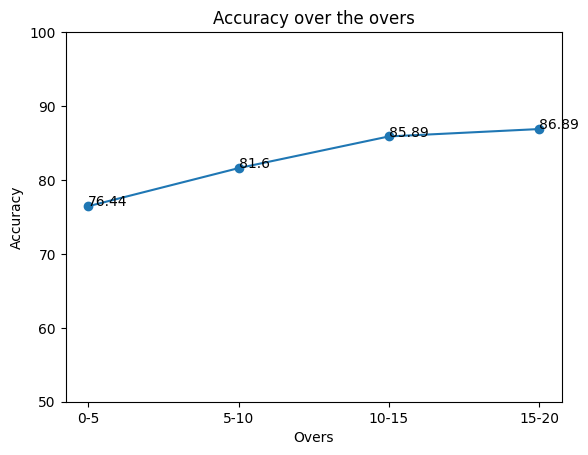

In [106]:
# plot
x = ['0-5', '5-10', '10-15', '15-20']
y = [acc_0_5 * 100, acc_5_10 * 100, acc_10_15 * 100, acc_15_20 * 100]

plt.plot(x, y, marker='o')
plt.ylim(50, 100)
plt.title('Accuracy over the overs')
plt.xlabel('Overs')
for i in range(len(x)):
    plt.text(x[i], y[i], round(y[i],2))
plt.ylabel('Accuracy')
plt.show()

In [105]:
# test model over 4 over intervals
acc_0_4, acc_4_8, acc_8_12, acc_12_16, acc_16_20 = test_over_overs_4(fnn_1l_model, isnn=True)

print(f'First 4 Overs Accuracy: {acc_0_4}')
print(f'4-8 Overs Accuracy: {acc_4_8}')
print(f'8-12 Overs Accuracy: {acc_8_12}')
print(f'12-16 Overs Accuracy: {acc_12_16}')
print(f'16-20 Overs Accuracy: {acc_16_20}')

1857/1857 ━━━━━━━━━━━━━━━━━━━━ 2s 853us/step - accuracy: 0.7649 - loss: 0.4887
2033/2033 ━━━━━━━━━━━━━━━━━━━━ 2s 896us/step - accuracy: 0.8154 - loss: 0.4074
1951/1951 ━━━━━━━━━━━━━━━━━━━━ 2s 909us/step - accuracy: 0.8420 - loss: 0.3418
1639/1639 ━━━━━━━━━━━━━━━━━━━━ 2s 946us/step - accuracy: 0.8764 - loss: 0.2923
743/743 ━━━━━━━━━━━━━━━━━━━━ 1s 877us/step - accuracy: 0.8607 - loss: 0.3202
First 4 Overs Accuracy: 0.755996584892273
4-8 Overs Accuracy: 0.8053061962127686
8-12 Overs Accuracy: 0.838340163230896
12-16 Overs Accuracy: 0.8677140474319458
16-20 Overs Accuracy: 0.865414559841156


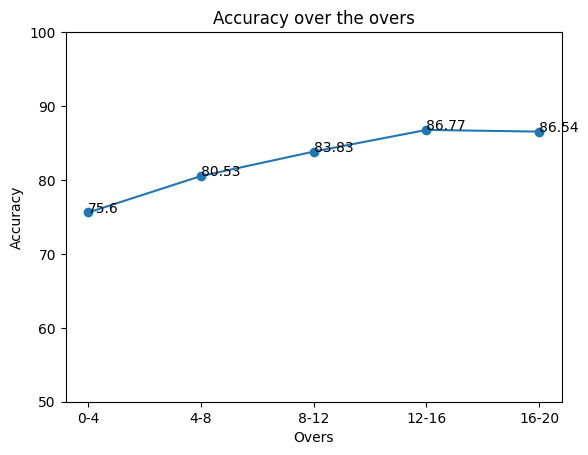

In [107]:
# plot
x = ['0-4', '4-8', '8-12', '12-16', '16-20']
y = [acc_0_4 * 100, acc_4_8 * 100, acc_8_12 * 100, acc_12_16 * 100, acc_16_20 * 100]

plt.plot(x, y, marker='o')
plt.ylim(50, 100)
plt.title('Accuracy over the overs')
plt.xlabel('Overs')
for i in range(len(x)):
    plt.text(x[i], y[i], round(y[i],2))
plt.ylabel('Accuracy')
plt.show()

In [99]:
# save the model
fnn_1l_model.save('./models/fnn_1l_model.keras')

## Multilayer NN

In [109]:
fnn_2l_model = Sequential()

fnn_2l_model.add(Dense(5, activation='relu', input_shape=(5,)))
fnn_2l_model.add(Dense(64, activation='relu'))
fnn_2l_model.add(Dense(32, activation='relu'))
fnn_2l_model.add(Dense(1, activation='sigmoid'))

fnn_2l_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

fnn_2l_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

Epoch 1/10


c:\Users\Rushabh Javeri\Sem-10\NNDL\Project\.venv\lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6577/6577 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.8073 - loss: 0.4195
Epoch 2/10
6577/6577 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.8164 - loss: 0.3917
Epoch 3/10
6577/6577 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.8184 - loss: 0.3872
Epoch 4/10
6577/6577 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.8184 - loss: 0.3875
Epoch 5/10
6577/6577 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.8179 - loss: 0.3876
Epoch 6/10
6577/6577 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.8182 - loss: 0.3862
Epoch 7/10
6577/6577 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.8211 - loss: 0.3835
Epoch 8/10
6577/6577 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.8205 - loss: 0.3841
Epoch 9/10
6577/6577 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8190 - loss: 0.3877
Epoch 10/10
6577/6577 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.8206 - loss: 0.3857


In [110]:
# predict
y_pred = fnn_2l_model.predict(X_test)

loss, accuracy = fnn_2l_model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

1645/1645 ━━━━━━━━━━━━━━━━━━━━ 2s 960us/step
1645/1645 ━━━━━━━━━━━━━━━━━━━━ 2s 892us/step - accuracy: 0.8203 - loss: 0.3892
Loss: 0.38830092549324036, Accuracy: 0.8211536407470703


## Trying Dropout

In [116]:
fnn_2l_do_model = Sequential()

fnn_2l_do_model.add(Dense(5, activation='relu', input_shape=(5,)))
fnn_2l_do_model.add(Dense(64, activation='relu'))
fnn_2l_do_model.add(Dropout(0.6))
fnn_2l_do_model.add(Dense(32, activation='relu'))
fnn_2l_do_model.add(Dropout(0.4))
fnn_2l_do_model.add(Dense(1, activation='sigmoid'))

fnn_2l_do_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

fnn_2l_do_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
6577/6577 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.7914 - loss: 0.4459
Epoch 2/10
6577/6577 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8172 - loss: 0.4014
Epoch 3/10
6577/6577 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.8197 - loss: 0.3993
Epoch 4/10
6577/6577 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.8176 - loss: 0.4028
Epoch 5/10
6577/6577 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.8168 - loss: 0.4013
Epoch 6/10
6577/6577 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.8179 - loss: 0.4004
Epoch 7/10
6577/6577 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.8194 - loss: 0.4003
Epoch 8/10
6577/6577 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8180 - loss: 0.4017
Epoch 9/10
6577/6577 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.8178 - loss: 0.4005
Epoch 10/10
6577/6577 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.8175 - loss: 0.4016


## Single Layer NN regularized (L2)

In [117]:
# model with 1 hidden layer and L2 regularization
fnn_1l_l2_model = Sequential()

fnn_1l_l2_model.add(Dense(5, activation='relu', input_shape=(5,), kernel_regularizer=l2(0.01)))
fnn_1l_l2_model.add(Dense(5, activation='relu', kernel_regularizer=l2(0.01)))
fnn_1l_l2_model.add(Dense(1, activation='sigmoid'))

fnn_1l_l2_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

fnn_1l_l2_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10


c:\Users\Rushabh Javeri\Sem-10\NNDL\Project\.venv\lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6577/6577 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.7926 - loss: 0.5557 - val_accuracy: 0.8197 - val_loss: 0.4496
Epoch 2/10
6577/6577 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.8191 - loss: 0.4452 - val_accuracy: 0.8181 - val_loss: 0.4353
Epoch 3/10
6577/6577 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8189 - loss: 0.4311 - val_accuracy: 0.8189 - val_loss: 0.4269
Epoch 4/10
6577/6577 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.8190 - loss: 0.4274 - val_accuracy: 0.8181 - val_loss: 0.4239
Epoch 5/10
6577/6577 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8194 - loss: 0.4226 - val_accuracy: 0.8200 - val_loss: 0.4188
Epoch 6/10
6577/6577 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8178 - loss: 0.4214 - val_accuracy: 0.8199 - val_loss: 0.4169
Epoch 7/10
6577/6577 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.8203 - loss: 0.4163 - val_accuracy: 0.8196 - val_loss: 0.4148
Epoch 8/10
6577/6577 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8182 - loss: 0.4167 - val_ac